<div>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Escudo_de_Atl%C3%A9tico_Junior.svg/1200px-Escudo_de_Atl%C3%A9tico_Junior.svg.png" alt="alt text" width="300" height="300" >
</div>

# Análisis del Junior en Liga Aguila 2019-2 

*Por Cristian Gómez*

[Linkedin](https://www.linkedin.com/in/cristian-david-g%C3%B3mez-rom%C3%A1n-5a0067142) [GitHub](https://github.com/cristiangomez811)


Este es el análisis del **Junior**, **2do lugar** en  
la Liga Aguila de Colombia en la temporada **2019-2**.

Este análisis se toma desde un dataset propio obtenido a partir  
de datos mostrados en internet logrando un dataset con las  
siguientes columnas y su explicación: 

* **jugador** - *El nombre del jugador del equipo*
* **goles a favor** - *Cantidad de goles marcados por el jugador en la temporada*
* **goles de cabeza** - *Cuantos de los goles marcados fueron de cabeza*
* **goles de penalti** - *Cuantos de los goles marcados fueron de penalti durante el partido*
* **goles a favor con pie izquerdo** - *Cuantos de los goles marcados fueron con el pie izquerdo*
* **goles a favor con pie derecho** - *Cuantos de los goles marcados fueron con el pie derecho*
* **targetas amarillas** - *Cuantas targetas amarillas cometió el jugador*
* **targetas rojas** - *Cuantas targetas rojas cometio el jugador*
* **faltas cometidas** - *Faltas cometidas en la temporada*
* **faltas resibidas** - *Faltas que se le hicieron al jugador en la termporada*
* **balones recuperados** - *Los balones que recupero el jugador*
* **balones perdidos** - *Los balones que el jugador perdío en la termporada*
* **regates conseguidos** - *Cantidad de veces que el jugador logro regatear al rival*
* **regateado** - *Cantidad de veces que el rival regateó al jugador*
* **pases buenos** - *Cantidad de pases logrados durante la temporada*
* **pases totales** - *Cantidad todal de pases intentados en la temporada*
* **asistencias** - *Cantidad de asistencias logradas en la temporada*
* **remates** - *Cantidad de remates a porteria durante la temporada*
* **parada** - *Remates atajados, si el jugador es un portero*
* **goles en contra** - *Goles hechos al jugador, si el jugador es un portero*

In [3]:
# Importe de librerias para el análisis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def plot_barh(x,y,step =1,title='',x_label='',y_label=''):
    # crear el grafico
    my_pal = ['Green' if value >= y.nlargest(1).min() else 'Orange' for value in y]
    y_range = list(range(0,y.max()+1,step))
    plt.barh(x,y, color=my_pal)
    plt.xticks(y_range)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.title(title,fontsize=14)
    plt.show()
    
def pie_plot(list,labels):
    df_goles = pd.DataFrame(list, index=labels, columns=['x'])
     # make the plot
    df_goles.plot(kind='pie', subplots=True, figsize=(10, 10))

In [5]:
# Carga de datos
df = pd.read_excel('datasets/junior.xlsx')
df.head()

,Jugador,goles a favor,goles de cabeza,goles de penalti,goles a favor con pie izquierdo,goles a favor con pie derecho,tarjetas amarillas,tarjetas rojas,faltas cometidas,faltas recibidas,balones recuperados,balones perdidos,regates conseguidos,regateado,pases buenos,pases totales,asistencias,remates,parada,goles en contra
0,Stiwart Acuña,0,0,0,0,0,2,0,4,1,5,21,0,1,36,45,0,6,0,0
1,Víctor Cantillo,3,0,0,0,3,7,0,17,69,159,189,32,8,1393,1521,1,22,0,0
2,Edwin Cetre,4,0,0,2,2,2,0,24,44,47,135,17,18,214,255,1,30,0,0
3,José Luis Chunga,0,0,0,0,0,0,0,0,0,12,9,0,0,12,21,0,0,6,2
4,Willer Ditta,0,0,0,0,0,2,0,10,8,87,114,4,2,703,801,0,1,0,0


## Datos generales del equipo

In [6]:
goles = df['goles a favor'].sum()
print("El equipo logro hacer ",goles," goles")
pases_buenos = df['pases buenos'].sum()
print("El equipo logro hacer ",pases_buenos," pases buenos")
pases_totales = df['pases totales'].sum()
print("El equipo intento hacer ",pases_totales," pases")
remates = df['remates'].sum()
print("El equipo logro hacer ",remates," remates")
faltas_hechas = df['faltas cometidas'].sum()
print("El equipo cometio ",faltas_hechas," faltas")
faltas_recibidas = df['faltas recibidas'].sum()
print("El equipo recibio ",faltas_recibidas," faltas")
tarjetas_amarillas = df['tarjetas amarillas'].sum()
print("De las faltas hechas ",tarjetas_amarillas," se sancionarón con targeta amarilla")
tarjetas_rojas = df['tarjetas rojas'].sum()
print("De las faltas hechas ",tarjetas_rojas," se sancionarón con targeta roja")

El equipo logro hacer  26  goles
El equipo logro hacer  9375  pases buenos
El equipo intento hacer  11325  pases
El equipo logro hacer  247  remates
El equipo cometio  413  faltas
El equipo recibio  396  faltas
De las faltas hechas  72  se sancionarón con targeta amarilla
De las faltas hechas  5  se sancionarón con targeta roja


## Datos derivados del dataset

In [7]:
goles_remates = df['goles a favor'].sum() / df['remates'].sum()
print("De los remates hechos ", round(goles_remates*100), "% fueron goles")
precision_pases = df['pases buenos'].sum() / df['pases totales'].sum()
print("De los pases hechos ",round(precision_pases*100),"% fueron buenos")
tarjetas_faltas = (df['tarjetas amarillas'].sum() + df['tarjetas rojas'].sum()) / df['faltas cometidas'].sum()
print("De las faltas realizadas ",round(tarjetas_faltas*100),"% se sancionaron con tarjetas")
tarjetas_rojas = df['tarjetas rojas'].sum() / (df['tarjetas amarillas'].sum() + df['tarjetas rojas'].sum())
print("De las tarjetas realizadas el ",round(tarjetas_rojas*100),"% se sancionaron con tarjeta roja")
balones_recuperados_perdidos = df['balones recuperados'].sum() / df['balones perdidos'].sum()
print("De los balones perdidos el ",round(balones_recuperados_perdidos*100),"% fueron recuperados")
faltas_hechas_recibidas = df['faltas cometidas'].sum() / df['faltas recibidas'].sum()
print("Por cada falta hecha el equipo recibio ",round(faltas_hechas_recibidas,1))
regates_hechos_recibidos = df['regates conseguidos'].sum() / df['regateado'].sum()
print("Por cada vez que un jugador fue regateado ",round(regates_hechos_recibidos,1)," veces un jugador logra regatear a otro")

De los remates hechos  11.0 % fueron goles
De los pases hechos  83.0 % fueron buenos
De las faltas realizadas  19.0 % se sancionaron con tarjetas
De las tarjetas realizadas el  6.0 % se sancionaron con tarjeta roja
De los balones perdidos el  45.0 % fueron recuperados
Por cada falta hecha el equipo recibio  1.0
Por cada vez que un jugador fue regateado  1.4  veces un jugador logra regatear a otro


## Promedios por partido

In [8]:
goles_partido = df['goles a favor'].sum() / 27
print('goles por partido: ',round(goles_partido,2))
remates_partido = df['remates'].sum() / 27
print('remates por partido: ',round(remates_partido,2))
pases_partido = df['pases totales'].sum() / 27
print('pases por partido: ',round(pases_partido,2))
faltas_partido = df['faltas cometidas'].sum() / 27
print('faltas por partido: ',round(faltas_partido,2))
tarjetas_partido = (df['tarjetas amarillas'].sum() + df['tarjetas rojas'].sum()) / 27
print('tarjetas por partido: ',round(tarjetas_partido,2))
disputas_partido = (df['balones recuperados'].sum() + df['balones perdidos'].sum()) / 27
print('disputas por partido: ',round(disputas_partido,2))

goles por partido:  0.96
remates por partido:  9.15
pases por partido:  419.44
faltas por partido:  15.3
tarjetas por partido:  2.85
disputas por partido:  164.48


## Análisis por jugadores 
### Precisión de pases

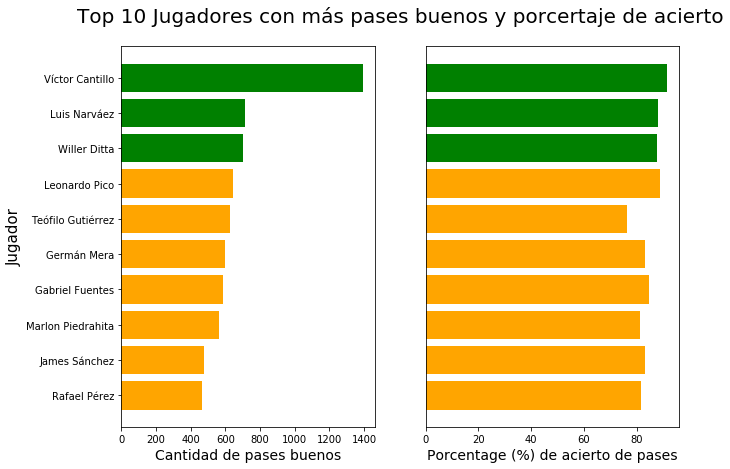

In [9]:
# Nombre de los jugadores top 10 en pases buenos
x=df.sort_values(by = ['pases buenos']).iloc[-10:,:]['Jugador']

# Canditad ve pases buenos
y = df['pases buenos'].nlargest(10).sort_values()

# Porcentaje de pases buenos vs todos los pases intentados
z1 = df.sort_values(by = ['pases buenos']).iloc[-10:,:]['pases buenos']
z2 = df.sort_values(by = ['pases buenos']).iloc[-10:,:]['pases totales']
z = z1 / z2
z = round(z,3)*100

# Colores distintivos al top 3 jugadores 
my_pal = ['Green' if pases >= y.nlargest(3).min() else 'Orange' for pases in y]
width = [3 if pases >= y.nlargest(3).min() else 1 for pases in y]

#figura y ejes en el plot
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 7), sharex=False)

ax1.barh(x, y, color = my_pal) 
ax1.annotate('Top 10 Jugadores con más pases buenos y porcertaje de acierto', (1.1, 1), xytext=(0, 30),
                    textcoords='offset points', xycoords='axes fraction',
                    ha='center', va='center', size=20)
ax1.set_xlabel('Cantidad de pases buenos', fontsize=14)
ax1.set_ylabel('Jugador',fontsize=15)
ax2.barh(x, z, color = my_pal)
ax2.set_yticks([])
ax2.set_xlabel('Porcentage (%) de acierto de pases',fontsize=14)
plt.show()


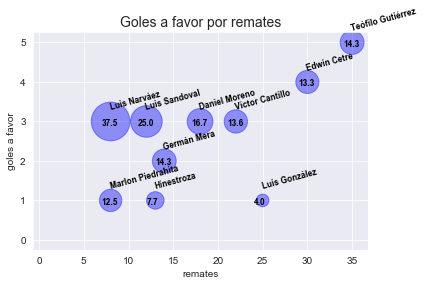

In [15]:
sns.set_style("darkgrid")
s = df['goles a favor'] / df['remates']
x = df['remates']
y=df['goles a favor']
p1 = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={"color":"blue","alpha":0.4,"s":s*4000})
p1.set_title('Goles a favor por remates', fontsize=14)
# add annotations one by one with a loop
for line in range(0,df.shape[0]):
    if s[line] > 0:
        p1.text(x[line]-0.2, y[line]+0.3, df.Jugador[line], horizontalalignment='left', rotation=15,size='small', color='black', weight='semibold')
        p1.text(x[line]-1, y[line]-0.1, round(s[line]*100,1), horizontalalignment='left',size='small', color='black', weight='semibold')



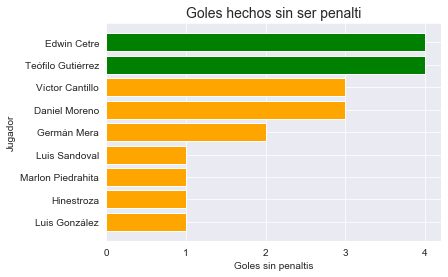

In [17]:
# Valores a análizar 
df['goles sin penalti'] = df['goles a favor'] - df['goles de penalti']

y = df.sort_values('goles sin penalti')['goles sin penalti'][df['goles sin penalti'] >0]
x = df.sort_values('goles sin penalti')['Jugador'][df['goles sin penalti']> 0]

# crear el grafico
plot_barh(x,y,x_label='Jugador',y_label='Goles sin penaltis',title='Goles hechos sin ser penalti')

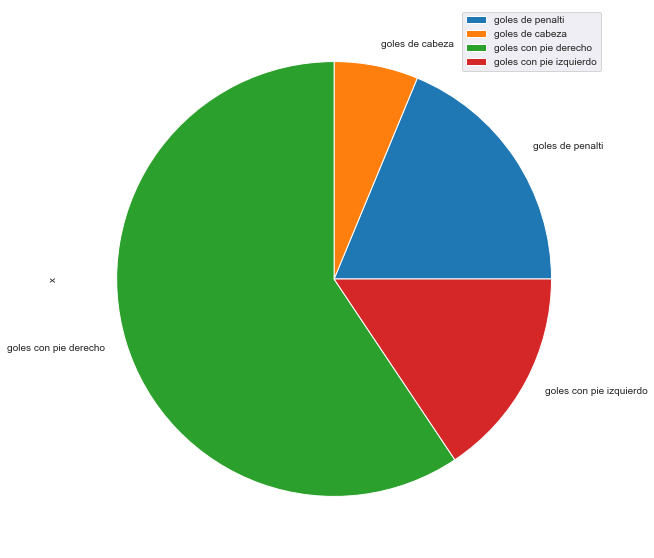

In [12]:
list_goles = [df['goles de penalti'].sum(),df['goles de cabeza'].sum(),df['goles a favor con pie derecho'].sum(),df['goles a favor con pie izquierdo'].sum()]
labels = ['goles de penalti', 'goles de cabeza', 'goles con pie derecho', 'goles con pie izquierdo']

pie_plot(list_goles,labels)

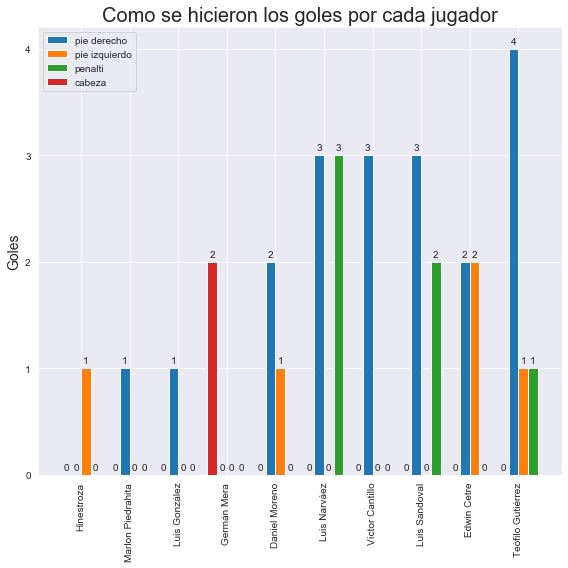

In [45]:
labels = df.sort_values('goles a favor')['Jugador'][df['goles a favor']>0]
goles_derecho = df.sort_values('goles a favor')['goles a favor con pie derecho'][df['goles a favor']>0]
goles_izquierdo = df.sort_values('goles a favor')['goles a favor con pie izquierdo'][df['goles a favor']>0]
penalti = df.sort_values('goles a favor')['goles de penalti'][df['goles a favor']>0]
cabeza = df.sort_values('goles a favor')['goles de cabeza'][df['goles a favor']>0]

x = np.arange(0,len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(x - width/2, goles_derecho, width, label='pie derecho')
rects2 = ax.bar(x + width/2, goles_izquierdo, width, label='pie izquierdo')
rects3 = ax.bar(x + width/2*3, penalti, width, label='penalti')
rects4 = ax.bar(x - width/2*3, cabeza, width, label='cabeza')

y_max = max([goles_derecho.max(),goles_izquierdo.max(),penalti.max(),cabeza.max()])
# Add some text for labels, title and custom x-axis tick labels, etc.
y_range = list(range(0,y_max+1,1))
ax.set_ylabel('Goles',fontsize=14)
ax.set_title('Como se hicieron los goles por cada jugador',fontsize=20)
ax.set_xticks(x)
ax.set_yticks(y_range)
ax.set_xticklabels(labels,rotation=90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
fig.tight_layout()

plt.show()

In [38]:
y_range

[0, 1, 2, 3, 4]